In [1]:
# Feel free to use this notebook for any data exploration you feel is useful
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 8)

In [2]:
df = pd.read_csv("../data/final_dataset.csv")
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


### Exploratory Data Analysis

In [3]:
df.shape

(13599, 15)

In [4]:
df.isna().sum()

user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

Sklearn implementation of Decision Tree uses a modified version of CART. The implementation does not appear to be using surrogate splits, unlike implementation in R. For generalizing the dataset for different models, I will handle the missing values myself based on statistical methods.

In [5]:
df.dtypes

user_id                     int64
age                       float64
workclass                  object
salary                    float64
education_rank              int64
marital-status             object
occupation                 object
race                       object
sex                        object
mins_beerdrinking_year    float64
mins_exercising_year      float64
works_hours                 int64
tea_per_year              float64
coffee_per_year           float64
great_customer_class        int64
dtype: object

`education_rank` appears to be an Ordinal Categorical variable. We can therefore treat it as a numeric feature.

In [6]:
df['user_id'] = df['user_id'].astype(object)

In [7]:
df.describe()

,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
count,13178.000000,13177.000000,13599.000000,13175.000000,13178.000000,13599.000000,11170.000000,11188.000000,13599.000000
mean,44.842009,37149.297355,10.675417,447.920607,46.034224,39.916317,217.276544,359.708169,0.085889
std,16.050574,24316.155119,2.224582,4782.134102,294.234126,9.839082,113.944411,164.680579,0.280210
min,14.000000,4872.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,20885.500000,9.000000,0.000000,0.000000,40.000000,175.000000,223.750000,0.000000
50%,50.000000,25912.750000,12.000000,0.000000,0.000000,40.000000,175.000000,447.000000,0.000000
75%,59.000000,48908.750000,12.000000,0.000000,0.000000,40.000000,276.000000,499.000000,0.000000
max,90.000000,363858.750000,16.000000,99999.000000,3900.000000,99.000000,499.000000,499.000000,1.000000


Surprisingly, more users lie in the 50-60 age bracket. I expected the app to be more popular with the young generation. Does this represent actual SkipTheDishes data?

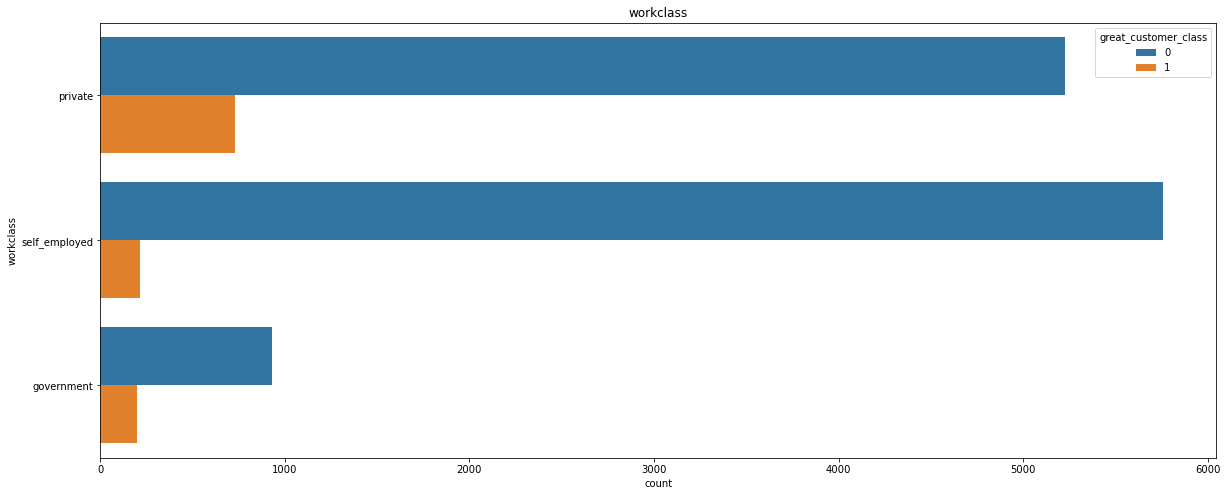

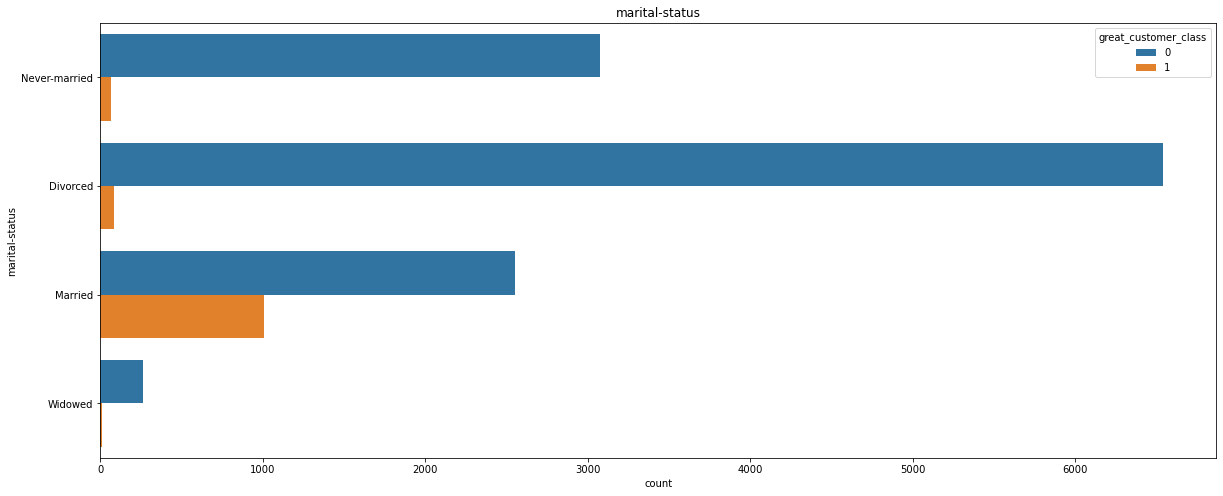

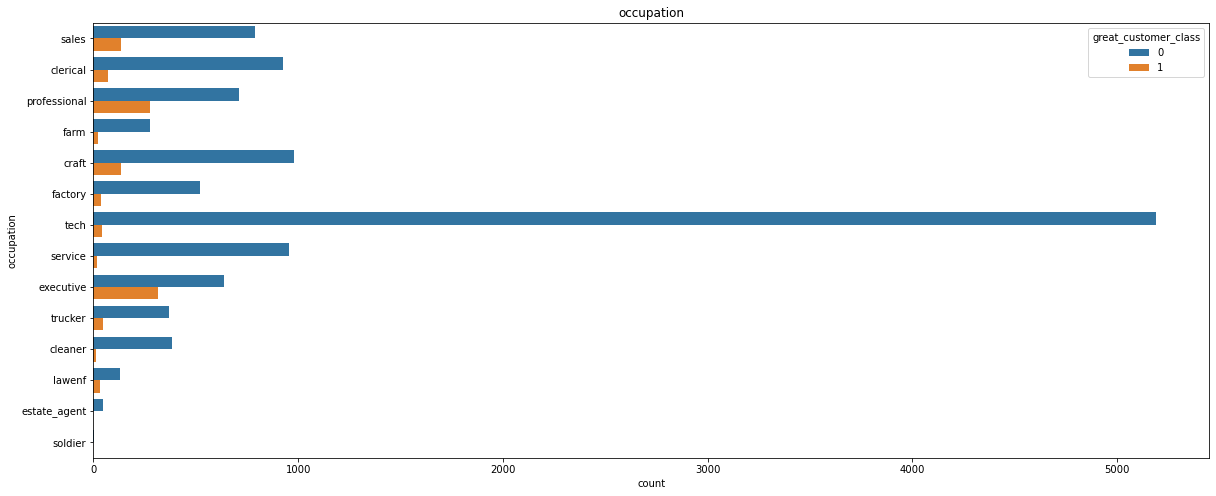

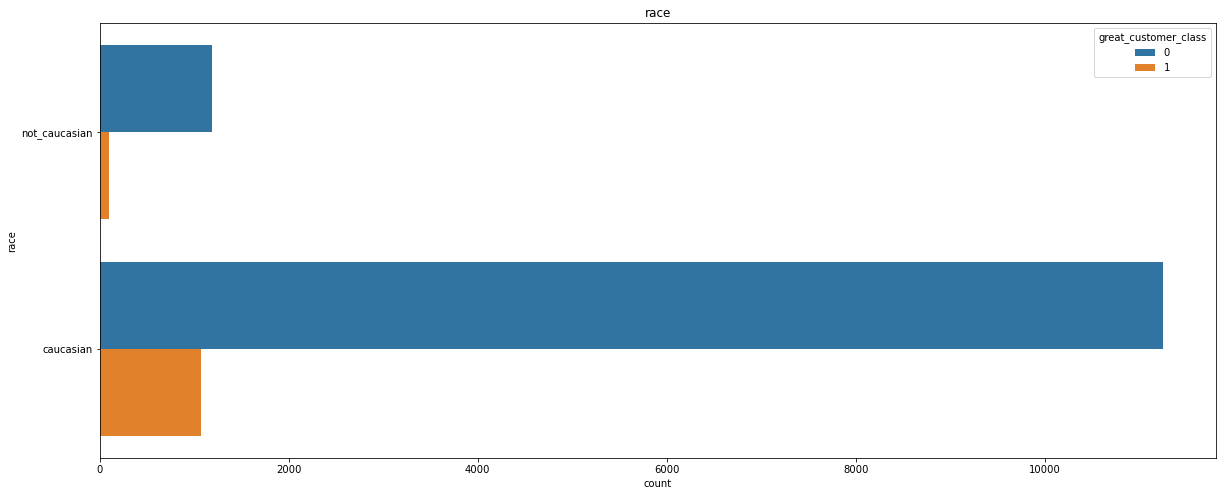

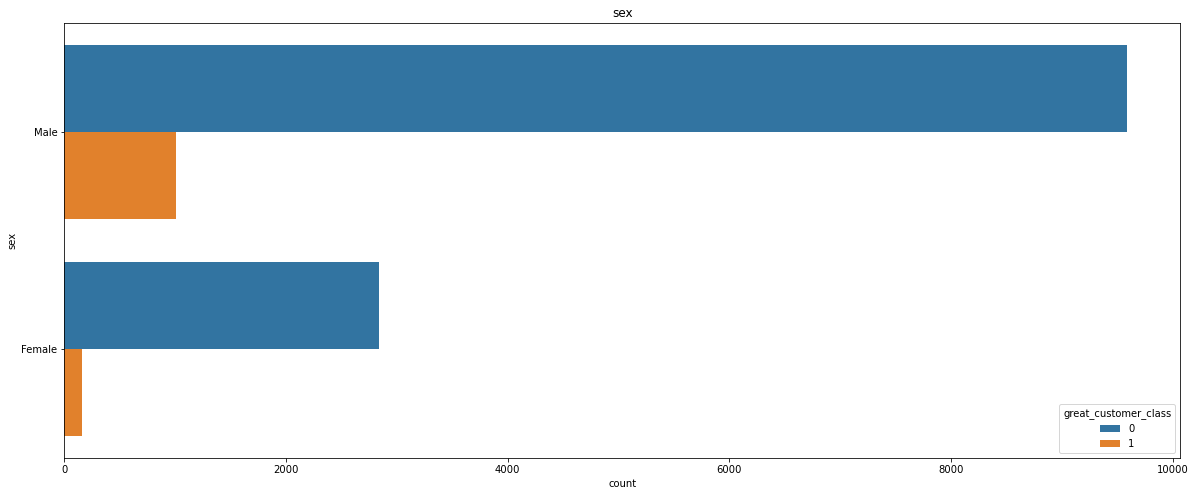

In [8]:
for col in df.drop(columns=['user_id']).select_dtypes(object):
    plt.figure()
    ax = sns.countplot(y=df[col], orient='v', hue=df['great_customer_class'])
    ax.set_title(col)

<AxesSubplot:>

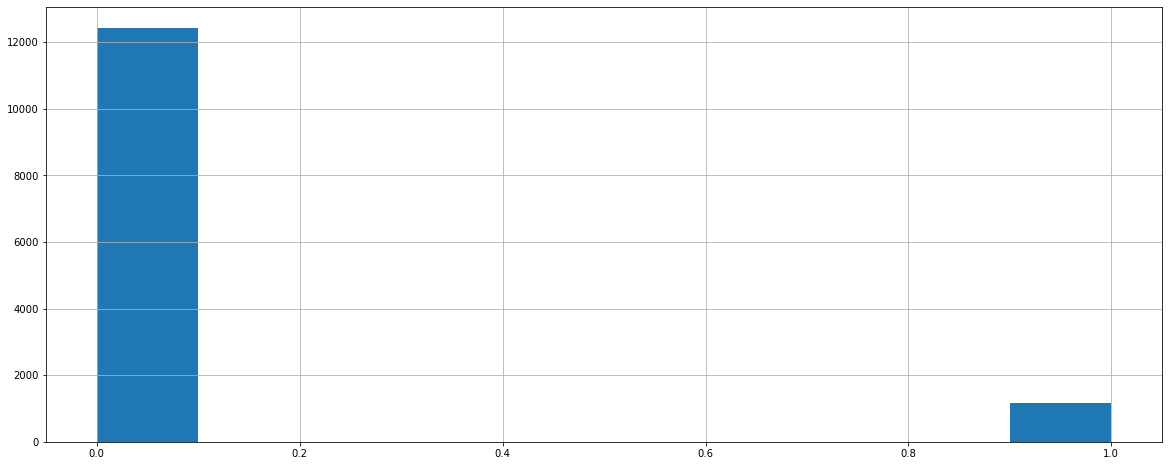

In [9]:
df['great_customer_class'].hist()

Event Rate:

In [10]:
df[df['great_customer_class'] == 1].shape[0] / df.shape[0]

0.08588866828443267

This is a highly imbalanced dataset.

In [11]:
df.dtypes

user_id                    object
age                       float64
workclass                  object
salary                    float64
education_rank              int64
marital-status             object
occupation                 object
race                       object
sex                        object
mins_beerdrinking_year    float64
mins_exercising_year      float64
works_hours                 int64
tea_per_year              float64
coffee_per_year           float64
great_customer_class        int64
dtype: object

<AxesSubplot:>

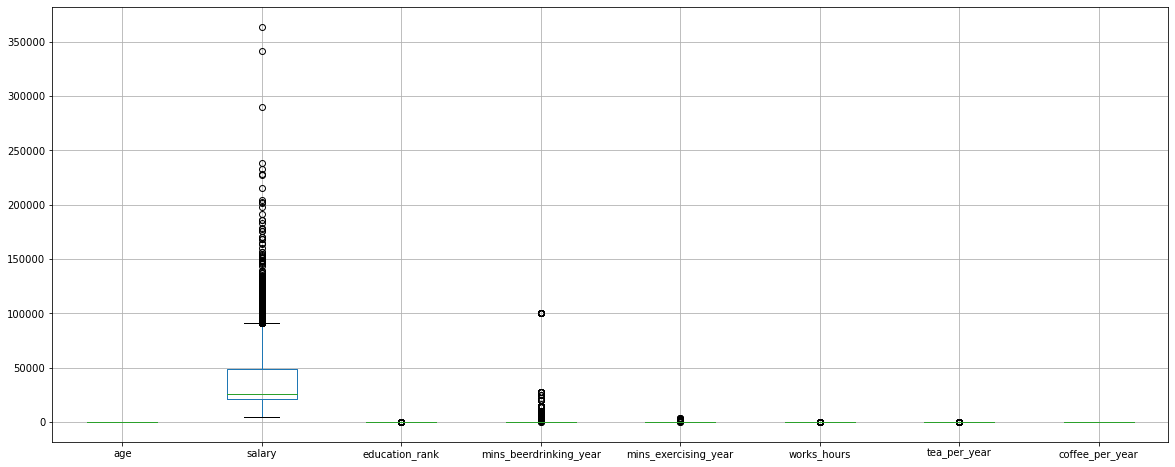

In [12]:
df.drop(columns=['great_customer_class']).boxplot()

Although there are outliers in some of the features, they do not appear to be erroneous and should not be deleted because of this reason. However, depending on the model, the outlier's may have significant influence over model parameters and should therefore be kept in mind.

For Decision Tree, it doesn't really matter since they are quite robut to outliers.

<AxesSubplot:>

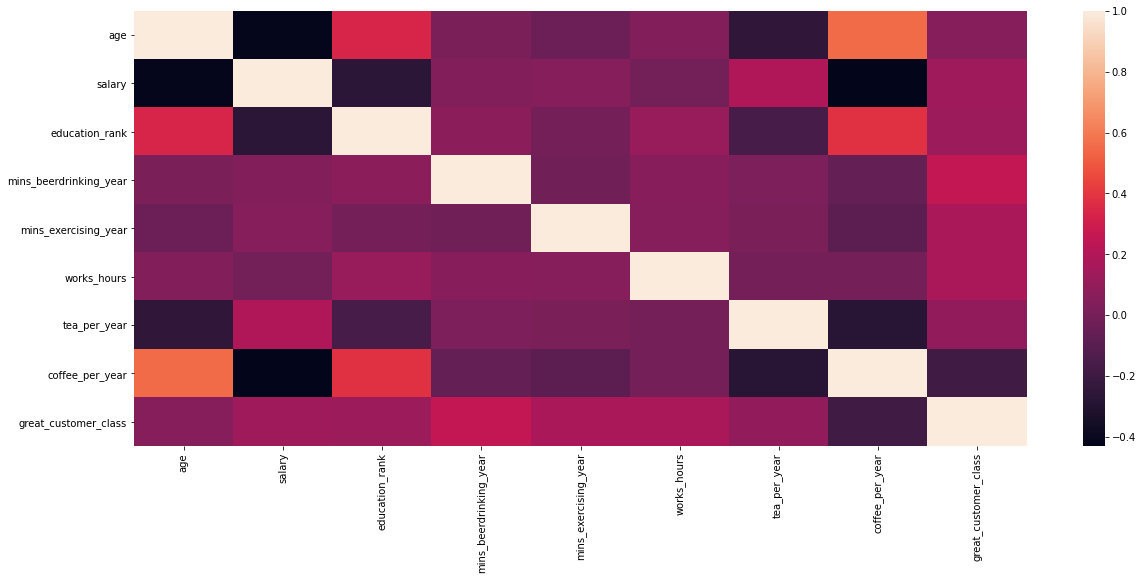

In [25]:
sns.heatmap(df.corr())

Some pairs do appear to be collinear with each other. With tree-based algorithms, this is not much of a problem as feature selection is intrinsically built into the algorithm but still it may lead to correlated trees in random forest (which may increae variance of the model.). Anyways, to make the dataset appropriate for all models, feature selection must be performed.

<AxesSubplot:xlabel='age', ylabel='salary'>

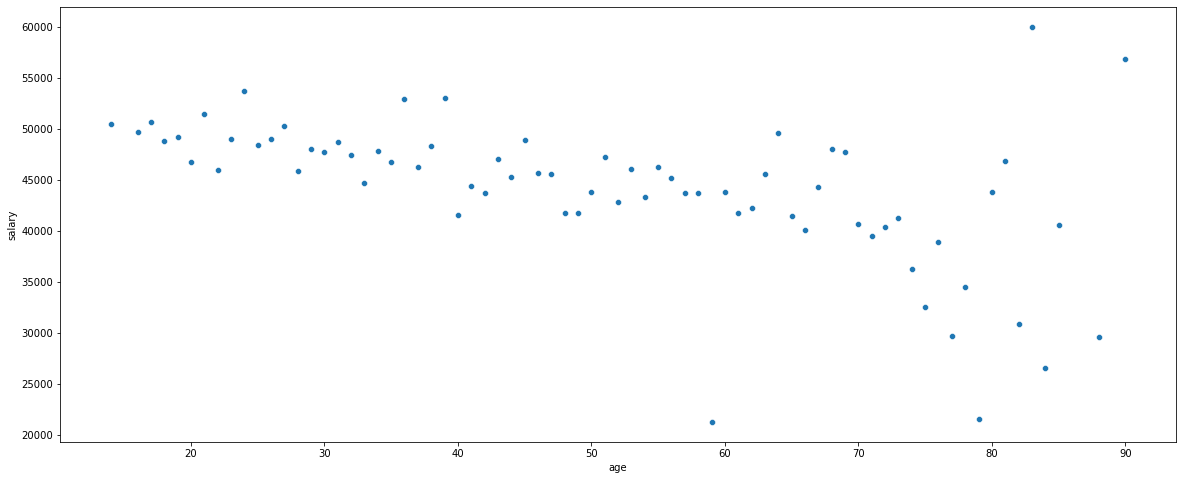

In [26]:
sns.scatterplot(data = df.groupby('age')['salary'].mean().reset_index(), x='age', y='salary')

This may be because the userbase of SkipTheDishes is not a representation of the actual population. Poor sampling or erroneous data?